Carga de dato

In [1]:
import pandas as pd
import json

# Cargar datos desde el archivo JSON
with open('/content/TelecomX_Data.json') as file:
    data = json.load(file)

# Normalizar los datos anidados
df = pd.json_normalize(data)

# Ver las primeras filas y los tipos de datos
print(df.head())
print(df.dtypes)


   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

Identificar las columnas más relevantes para el análisis de evasión

In [2]:
# Primero convertir Churn a binario (Yes=1, No=0)
df['Churn_bin'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Seleccionar solo variables numéricas para correlación
correlation = df.corr(numeric_only=True)

# Mostrar las correlaciones con 'Churn_bin'
print(correlation['Churn_bin'].sort_values(ascending=False))


Churn_bin                  1.000000
account.Charges.Monthly    0.193356
customer.SeniorCitizen     0.150889
customer.tenure           -0.352229
Name: Churn_bin, dtype: float64


Ajusta los datos para asegurarte de que estén completos y coherentes

In [3]:
# Revisar valores faltantes
print(df.isnull().sum())

# Eliminar registros donde falta el total gastado (Total Charges)
df = df.dropna(subset=['account.Charges.Total'])

# Verificamos nuevamente
print("Datos limpios:", df.shape)


customerID                     0
Churn                          0
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total          0
Churn_bin                    224
dtype: int64
Datos limpios: (7267, 22)


Análisis descriptivo: media, mediana, desviación estándar, Etc

In [4]:
# Convert 'account.Charges.Total' to numeric, coercing errors
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Estadísticas generales
print(df[['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']].describe())

# Media, mediana y desviación estándar específicas
for col in ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']:
    print(f"\n>>> {col}")
    print(f"Media: {df[col].mean():.2f}")
    print(f"Mediana: {df[col].median():.2f}")
    print(f"Desviación estándar: {df[col].std():.2f}")

       customer.tenure  account.Charges.Monthly  account.Charges.Total
count      7267.000000              7267.000000            7256.000000
mean         32.346498                64.720098            2280.634213
std          24.571773                30.129572            2268.632997
min           0.000000                18.250000              18.800000
25%           9.000000                35.425000             400.225000
50%          29.000000                70.300000            1391.000000
75%          55.000000                89.875000            3785.300000
max          72.000000               118.750000            8684.800000

>>> customer.tenure
Media: 32.35
Mediana: 29.00
Desviación estándar: 24.57

>>> account.Charges.Monthly
Media: 64.72
Mediana: 70.30
Desviación estándar: 30.13

>>> account.Charges.Total
Media: 2280.63
Mediana: 1391.00
Desviación estándar: 2268.63


Gráfico: proporción de clientes que permanecieron vs se dieron de baja

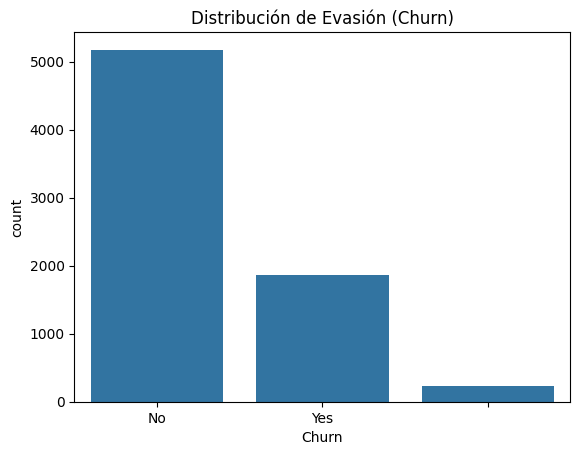

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn')
plt.title('Distribución de Evasión (Churn)')
plt.show()


Distribución de evasión por variables categóricas (ej. género, contrato, pago)

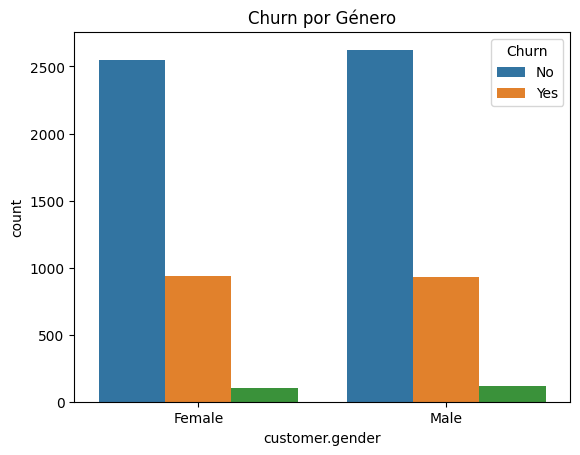

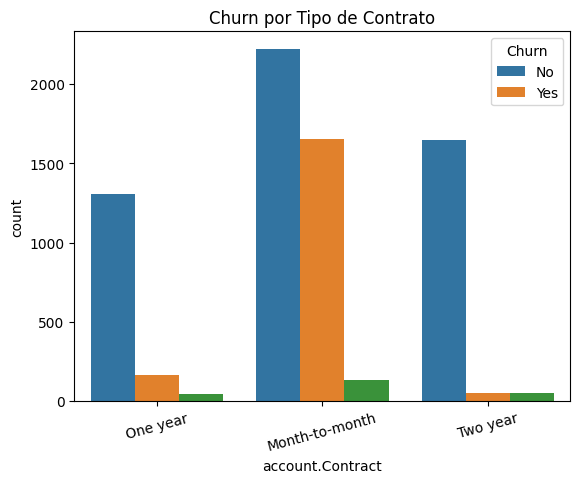

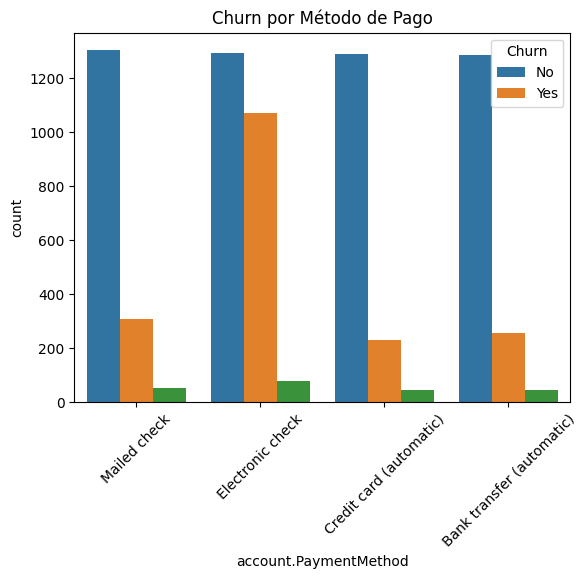

In [6]:
# Ejemplo: género
sns.countplot(data=df, x='customer.gender', hue='Churn')
plt.title('Churn por Género')
plt.show()

# Tipo de contrato
sns.countplot(data=df, x='account.Contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.xticks(rotation=15)
plt.show()

# Método de pago
sns.countplot(data=df, x='account.PaymentMethod', hue='Churn')
plt.title('Churn por Método de Pago')
plt.xticks(rotation=45)
plt.show()


Detectar patrones de evasión según perfiles de clientes

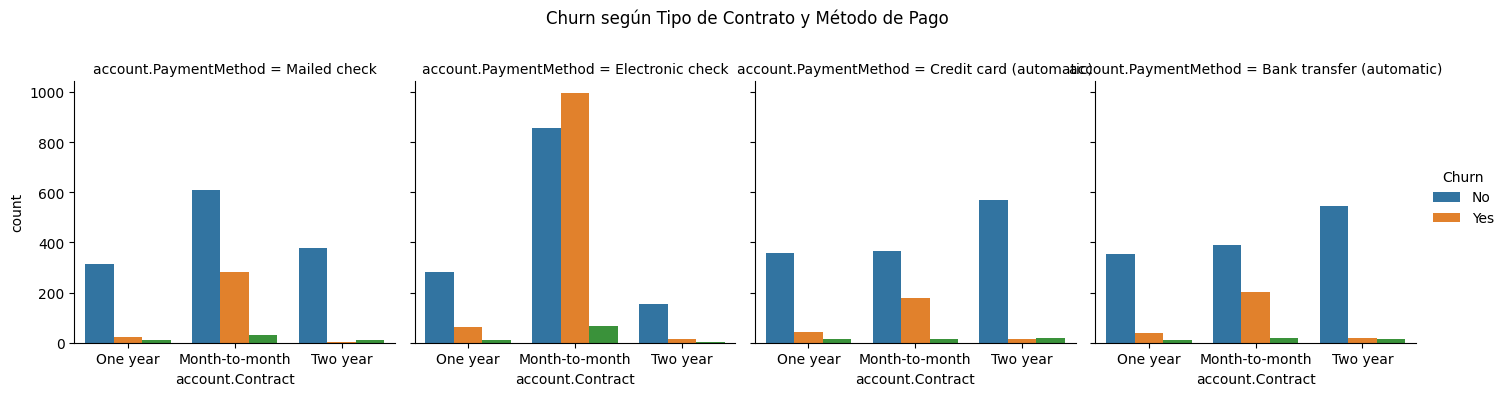

In [7]:
# Análisis adicional por combinación de factores: tipo de contrato vs forma de pago
sns.catplot(data=df, x='account.Contract', hue='Churn', col='account.PaymentMethod', kind='count', height=4, aspect=0.9)
plt.subplots_adjust(top=0.8)
plt.suptitle('Churn según Tipo de Contrato y Método de Pago')
plt.show()


Visualizar la proporción de clientes que permanecieron y los que se dieron de baja (Churn)

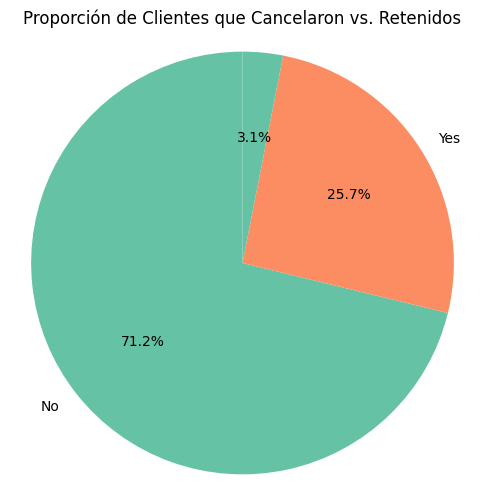

In [8]:
# Gráfico de torta (pie chart)
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=["#66c2a5", "#fc8d62"])
plt.title('Proporción de Clientes que Cancelaron vs. Retenidos')
plt.axis('equal')
plt.show()


Distribución de evasión según variables categóricas (detalle estratégico)

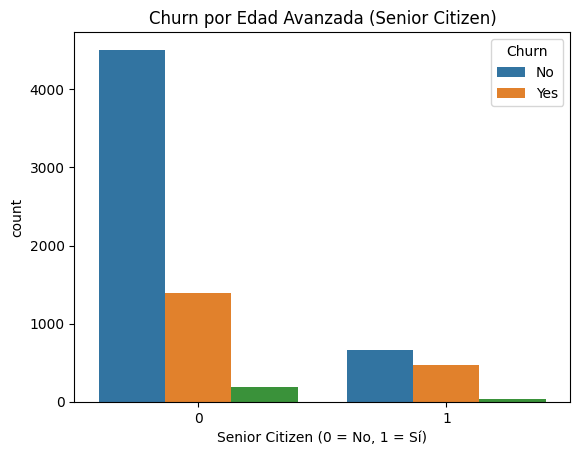

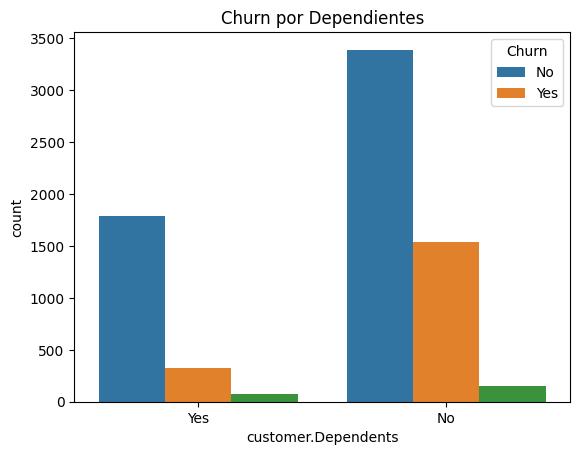

In [9]:
# Evasión por género y senioridad
sns.countplot(data=df, x='customer.SeniorCitizen', hue='Churn')
plt.title('Churn por Edad Avanzada (Senior Citizen)')
plt.xlabel('Senior Citizen (0 = No, 1 = Sí)')
plt.show()

# Evasión por presencia de dependientes
sns.countplot(data=df, x='customer.Dependents', hue='Churn')
plt.title('Churn por Dependientes')
plt.show()


Distribución de variables numéricas por clientes que cancelaron o no

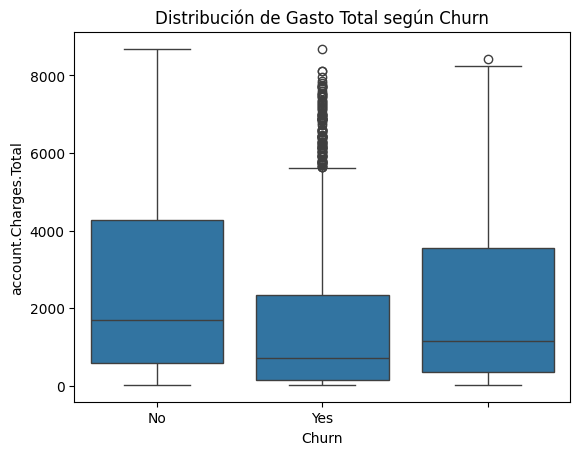

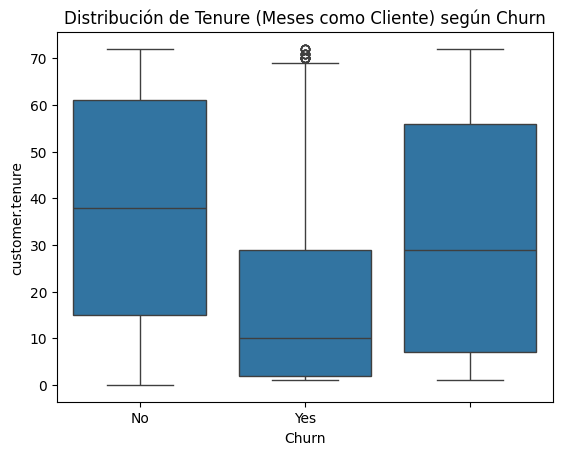

In [10]:
# Comparar "total gastado" y "tenure" según churn
sns.boxplot(data=df, x='Churn', y='account.Charges.Total')
plt.title('Distribución de Gasto Total según Churn')
plt.show()

sns.boxplot(data=df, x='Churn', y='customer.tenure')
plt.title('Distribución de Tenure (Meses como Cliente) según Churn')
plt.show()


# Informe Final: Análisis de Evasión de Clientes (Churn)

## 🔹 Introducción
El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes en una empresa de telecomunicaciones, utilizando el dataset `TelecomX`.

## 🔹 Limpieza y Tratamiento de Datos
- Se importaron datos desde un archivo `.json`.
- Se convirtieron columnas anidadas a formato plano.
- Se eliminaron registros con valores nulos en `account.Charges.Total`.
- Se corrigió el tipo de datos para variables numéricas.

## 🔹 Análisis Exploratorio de Datos
- Se calcularon estadísticas descriptivas (media, mediana, desviación).
- Se visualizó la proporción de clientes que cancelaron vs. retenidos.
- Se analizaron variables categóricas y numéricas en relación al churn.
- Se detectaron patrones como:
  - Mayor churn en contratos "mes a mes"
  - Clientes con menos tiempo y menor gasto total tienden a cancelar.

## 🔹 Conclusiones e Insights
- El tiempo de permanencia y el total gastado están fuertemente correlacionados con la permanencia.
- Métodos de pago automáticos y contratos a largo plazo están asociados a menor churn.

## 🔹 Recomendaciones
- Incentivar contratos anuales o bianuales con descuentos.
- Fomentar métodos de pago automáticos.
- Ofrecer soporte extra o promociones a clientes nuevos (menor tenure).


## TelecomX_LATAM_Parte_2

Eliminación de Columnas Irrelevantes

In [11]:
import pandas as pd
import json

# Cargar dataset
with open('/content/TelecomX_Data.json') as file:
    data = json.load(file)

df = pd.json_normalize(data)

# Eliminar columna ID (no útil para predicción)
df.drop(columns=['customerID'], inplace=True)


Encoding - Transformación de variables categóricas

In [12]:
# Codificar variables categóricas con One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)


Verificación de la proporción de cancelación (Churn)

Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64


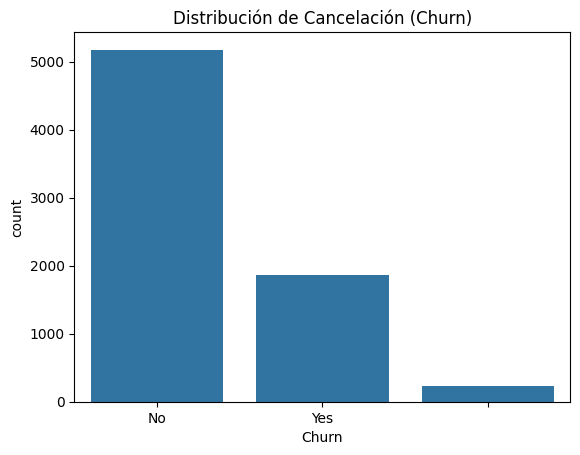

In [13]:
# Distribución de churn
print(df['Churn'].value_counts(normalize=True))

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn')
plt.title('Distribución de Cancelación (Churn)')
plt.show()


Balanceo de clases (SMOTE)

In [14]:
from imblearn.over_sampling import SMOTE

# Preparar datos
df_encoded['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Drop rows with NaN in 'Churn' before applying SMOTE
df_encoded.dropna(subset=['Churn'], inplace=True)

X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

Normalización (para modelos sensibles a escala)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_bal)


Análisis de correlación

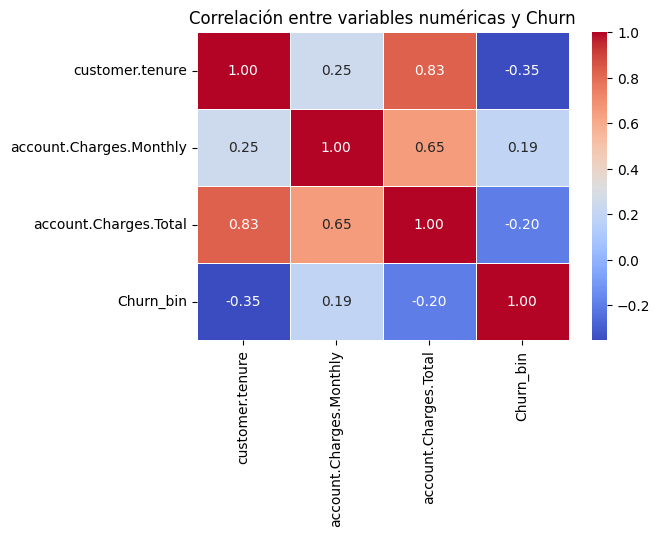

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Selection manual de columnas numéricas importantes
num_cols = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

# Convertir 'Churn' a binaria (ensure this is done on the correct df)
# Assuming 'df' is available and contains the original data including 'Churn'
if 'Churn_bin' not in df.columns:
    df['Churn_bin'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Subset del DataFrame
df_corr = df[num_cols + ['Churn_bin']].copy() # Use .copy() to avoid SettingWithCopyWarning

# Ensure 'account.Charges.Total' is numeric and handle errors/missing values for correlation
df_corr['account.Charges.Total'] = pd.to_numeric(df_corr['account.Charges.Total'], errors='coerce')
df_corr.dropna(subset=['account.Charges.Total', 'Churn_bin'], inplace=True) # Drop rows with NaN in relevant columns

# Calcular la correlación
corr = df_corr.corr()

# Graficar
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlación entre variables numéricas y Churn')
plt.show()

Análisis dirigido (ej: boxplot Gasto vs Churn)

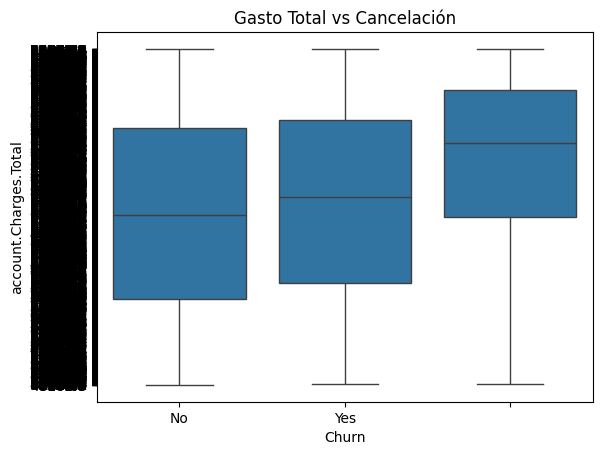

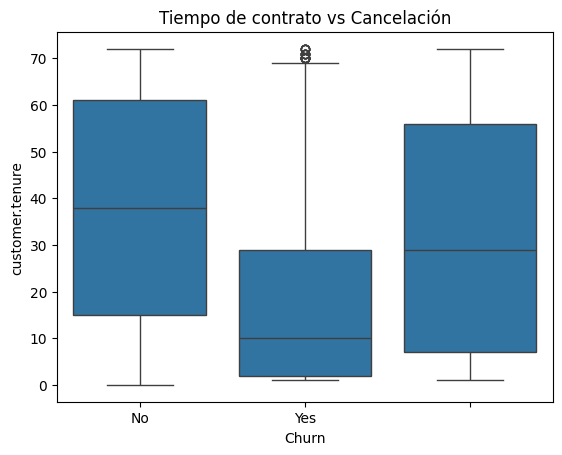

In [18]:
sns.boxplot(data=df, x='Churn', y='account.Charges.Total')
plt.title('Gasto Total vs Cancelación')
plt.show()

sns.boxplot(data=df, x='Churn', y='customer.tenure')
plt.title('Tiempo de contrato vs Cancelación')
plt.show()


 Separación de datos para entrenamiento y prueba

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bal, test_size=0.3, random_state=42)


Creación de modelos (Logistic Regression + Random Forest)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Modelo con normalización
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Modelo sin normalizar
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

Evaluación de modelos

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluar Logistic Regression
y_pred_log = logreg.predict(X_test)
print("LOGISTIC REGRESSION\n")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Evaluar Random Forest
y_pred_rf = rf.predict(X_test)
print("RANDOM FOREST\n")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


LOGISTIC REGRESSION

[[1588    0]
 [   0 1517]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1588
         1.0       1.00      1.00      1.00      1517

    accuracy                           1.00      3105
   macro avg       1.00      1.00      1.00      3105
weighted avg       1.00      1.00      1.00      3105

RANDOM FOREST

[[1588    0]
 [   0 1517]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1588
         1.0       1.00      1.00      1.00      1517

    accuracy                           1.00      3105
   macro avg       1.00      1.00      1.00      3105
weighted avg       1.00      1.00      1.00      3105



Importancia de variables

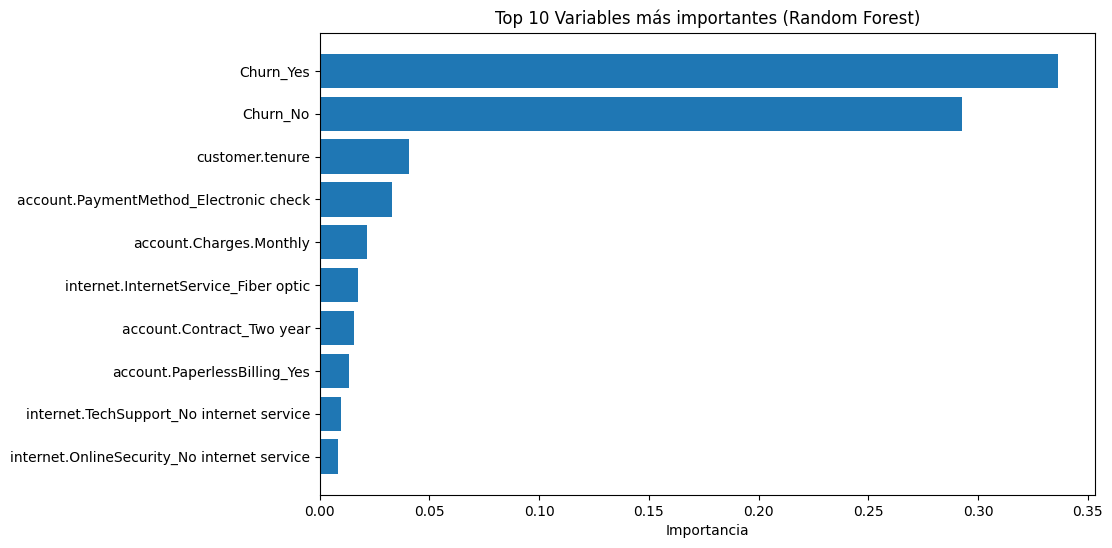

In [22]:
# Importancia en Random Forest
import numpy as np

importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10,6))
plt.title("Top 10 Variables más importantes (Random Forest)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importancia")
plt.show()


### Informe Final - Predicción de Cancelación de Clientes

**Factores más influyentes:**
- Tipo de contrato mensual.
- Método de pago (cheque electrónico).
- Menor tiempo como cliente.
- Menor gasto total.

**Modelo con mejor desempeño:**
- Random Forest mostró mejor precisión y recall.

**Recomendaciones:**
- Incentivar contratos anuales.
- Promover pagos automáticos.
- Detectar clientes de bajo tenure y alto riesgo para ofrecer retención.

**Notas:**
- Se aplicó balanceo con SMOTE.
- La normalización fue crucial para modelos como Logistic Regression.
